<a href="https://colab.research.google.com/github/niteshavagabond/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - Target variable

In [117]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [118]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cardiovascular Risk Prediction - Nitesh Verma/data_cardiovascular_risk.csv')

In [120]:
# top 5 index values
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [121]:
# last 5 index values
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [122]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [123]:
# shape of dataset
df.shape

(3390, 17)

In [124]:
# information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

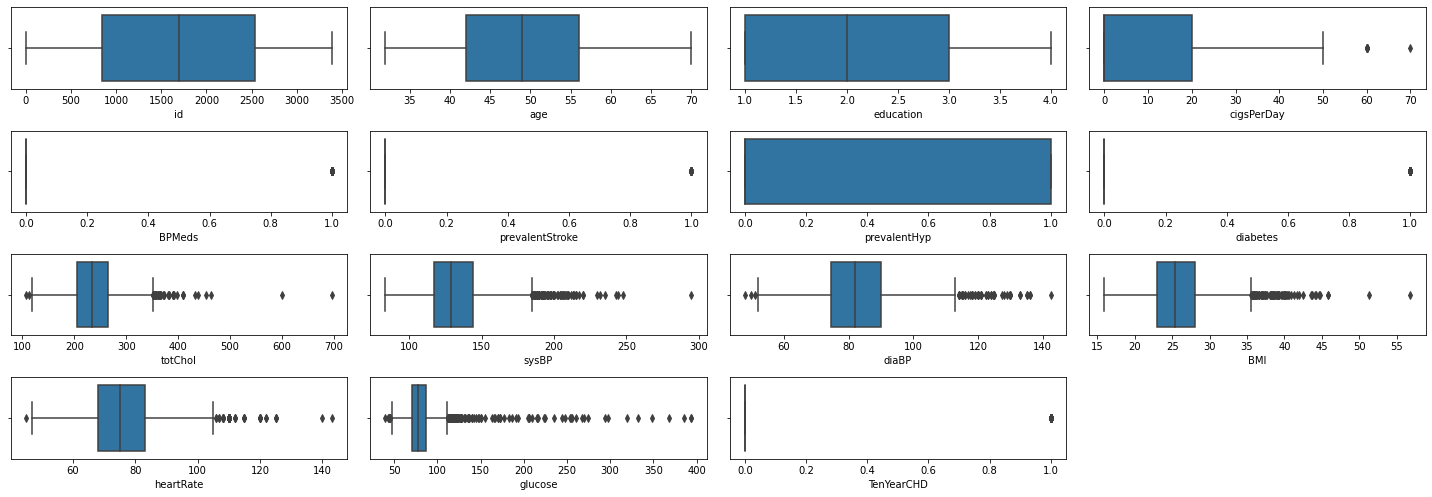

In [125]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

# Feature engineering

## 1. Droping irrelevant features

In [126]:
# droping irrelevant columns from dataset
df.drop(['id','education'], axis=1, inplace=True) # id and education status of patients are not going to help to predict cardiovascular risk 

* As id and education has not direct relation with Heart disease, we dropped these 2 columns

## 2. Handling null values

In [127]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
1,sex,object,0,0.00,2,"[F, M]"
2,is_smoking,object,0,0.00,2,"[YES, NO]"
3,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
4,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
5,prevalentStroke,int64,0,0.00,2,"[0, 1]"
6,prevalentHyp,int64,0,0.00,2,"[0, 1]"
7,diabetes,int64,0,0.00,2,"[0, 1]"
8,totChol,float64,38,1.12,240,"[221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238..."
9,sysBP,float64,0,0.00,226,"[148.0, 168.0, 116.0, 158.0, 136.5, 182.0, 232..."


In [128]:
# total null values present in columns
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* In the Dataset we have total of 3390 rows and 17 columns.

We havee missing values in:
 
*   cigsperday
*   BPMeds
*   totChol
*   BMI
*   Heart Rate
*   glucose


In [129]:
#Sanity check
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False).head()

glucose       8.97
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
dtype: float64

* Except glucose all other features in the dataset have less than 5% null values.
* Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

In [130]:
# dropping the missing value.
df = df.dropna(how = "any")

In [131]:
# Checking if there's still any null values left.
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* Now, no null values present in dataset

## 3. Checking duplicate values 

In [132]:
# Checking for the duplicate values
len(df[df.duplicated()])

0

## 4. Dealing with outliers

In [133]:
# Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O'and var not in ['BPMeds','diabetes','prevalentStroke','prevalentHyp','TenYearCHD']]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 8 numerical variables
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


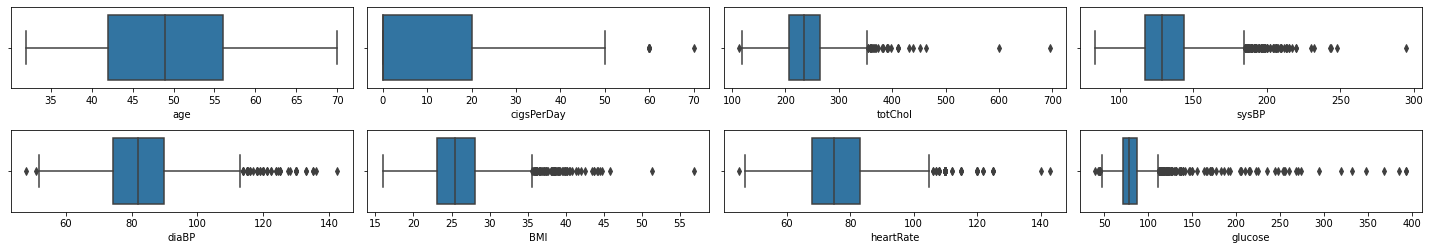

In [134]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

In [135]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in numerical:
  upper_lim = df[col].quantile(.95)
  lower_lim = df[col].quantile(.05)
  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim

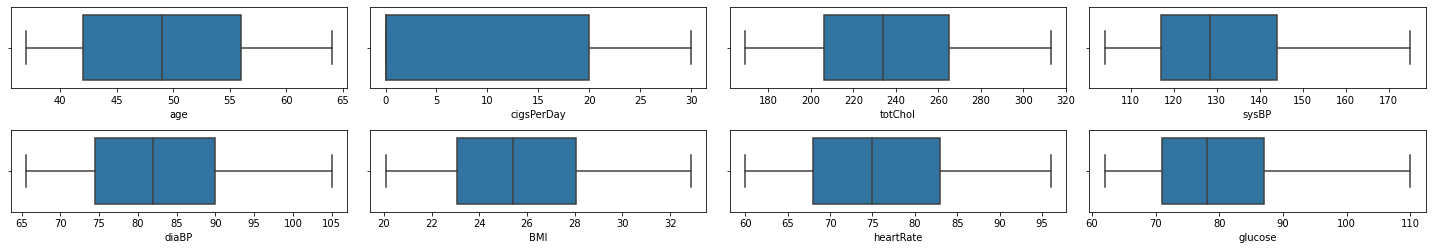

In [136]:
##finding result 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

* Now, there is no outliers present in our dataset.

## 5. Combining columns

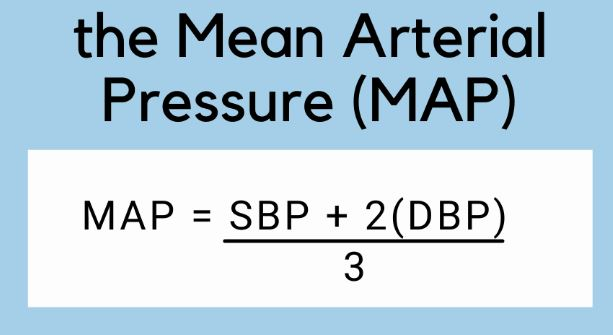

In [137]:
# Combining systolic and diastolic blood pressure column through formula 
df['map']=round((df['sysBP']+2*df['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column

# droping systolic and diastolic blood pressure column
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [138]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,map
1,37,M,NO,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333
2,46,F,YES,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000
3,50,M,YES,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333
4,64,F,YES,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.167
5,61,F,NO,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,128.333


## 6. Categorical encoding

In [139]:
# Categorical encoding for smoking column (0='NO' and 1 ='YES')
df['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

# Categorical encoding for smoking column (1='M' and 2 ='F')
df['sex'].replace({'M':1,'F':2},inplace=True)

## 7. Renaming Target Variable

In [140]:
df = df.rename(columns={'TenYearCHD':'Heart_Disease'})

# Exploratory Data Analysis (EDA)

##Correlation and Heatmap

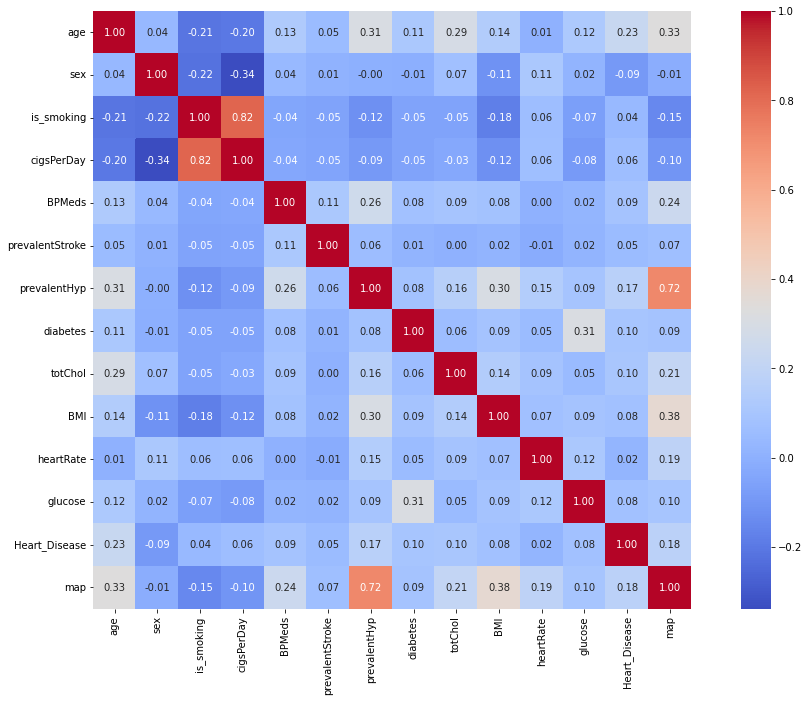

In [141]:
# ploting heat map finding correlation between columns
cdf = df.corr()

plt.subplots(figsize=(18, 11))
sns.heatmap(cdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True, cmap='coolwarm');

In [142]:
# droping is_smoking and prevalentHyp columns
df.drop(['is_smoking','prevalentHyp'],axis=1, inplace=True)

* we are droping is smoking column because cigsperday and is_smoking columns are corelated, they both indicating cigrates 
* we are droping prevalentHyp because map and prevalentHyp is coreleted and they both indicating hypertension

In [143]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
    Function to calculate VIF
  '''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
  return(vif)

In [144]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Heart_Disease']]])

,variables,VIF
0,age,43.015016
1,sex,11.922487
2,cigsPerDay,1.897678
3,BPMeds,1.103574
4,prevalentStroke,1.023506
5,diabetes,1.111451
6,totChol,39.593176
7,BMI,57.722514
8,heartRate,52.890963
9,glucose,41.309474


What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Methods to handle imbalanced dataset

* Resampling
* SMOTE (Synthetic Minority Oversampling Technique)
* BalancedBaggingClassifier

We shall use SMOTE Technique here to balance our imbalanced dataset

##Univariate analysis

### 1. Heart disease (target variable) distribution

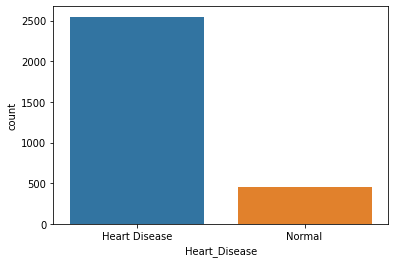

In [145]:
# visualize the target variable
g = sns.countplot(df['Heart_Disease'])
g.set_xticklabels(['Heart Disease','Normal'])
plt.show()

* Given dataset is highly imbalanced which will be dealt further at the time of model building.

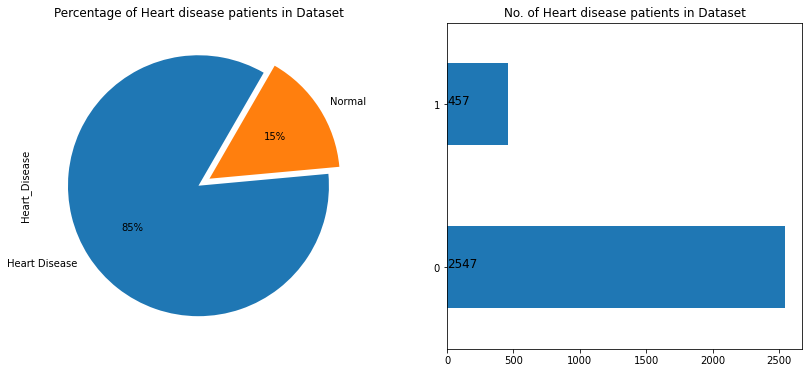

In [146]:
# Plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['Heart_Disease'].value_counts().plot.pie( x="Heart_Disease" ,y ='no.of patients', 
autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1,explode = (0,0.1))
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df['Heart_Disease'].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df['Heart_Disease'].value_counts().values): ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

* Over 85% of the people have heart disease

###2. Genderwise distribution

In [147]:
# creating separate df for normal and heart patients

patient =df[df['Heart_Disease']==1]

normal =df[df['Heart_Disease']==0]

Text(0.5, 1.0, 'Distribution of Gender')

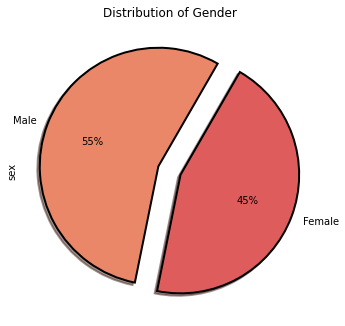

In [148]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("flare",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")

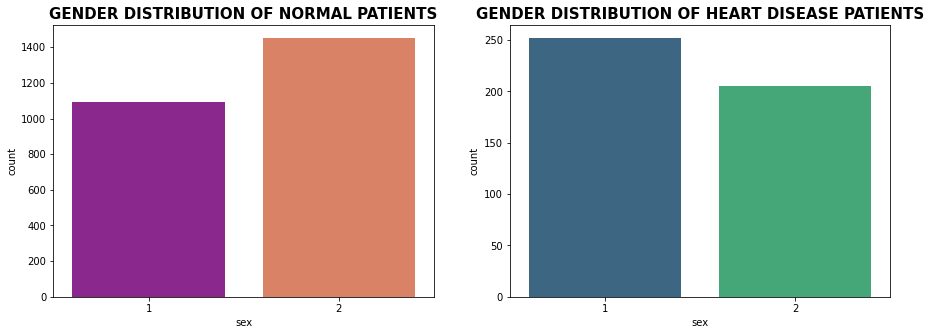

In [149]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['sex'], palette='plasma')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

###3. Age Distribution

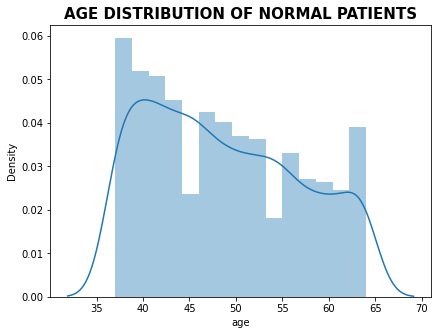

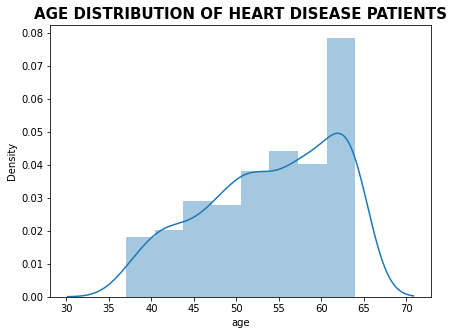

In [150]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(normal['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(patient['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

plt.show()

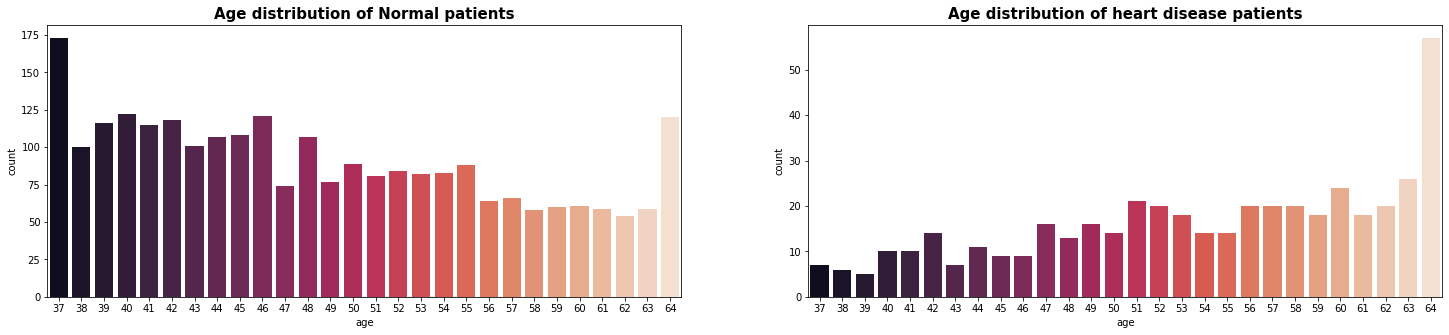

In [151]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['age'], palette='rocket')
plt.title('Age distribution of Normal patients', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['age'], palette='rocket')
plt.title('Age distribution of heart disease patients', fontsize=15, weight='bold' )
plt.show()

###4. Cigarette Consumption

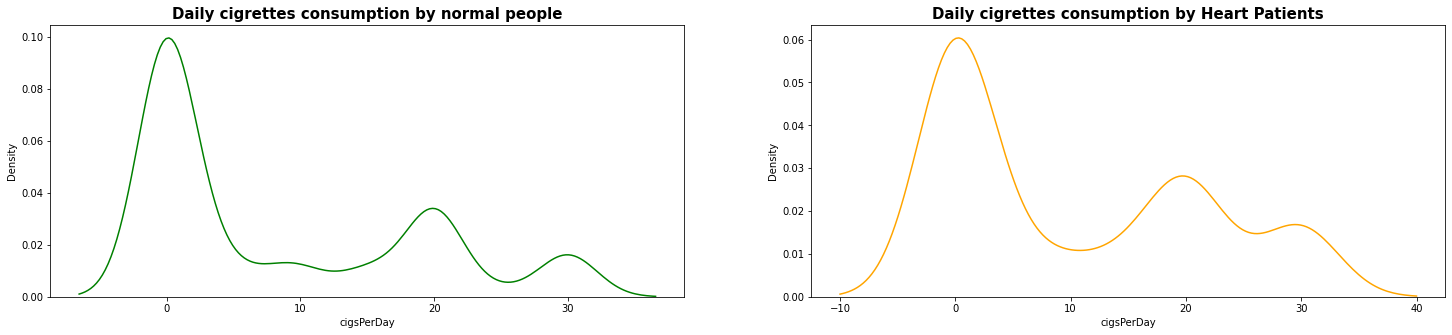

In [152]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.kdeplot(x='cigsPerDay',data = normal, color='green')
plt.title('Daily cigrettes consumption by normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.kdeplot(x='cigsPerDay',data = patient, color='orange')
plt.title('Daily cigrettes consumption by Heart Patients', fontsize=15, weight='bold' )
plt.show()

###5. Body Mass Index (BMI) Distribution

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


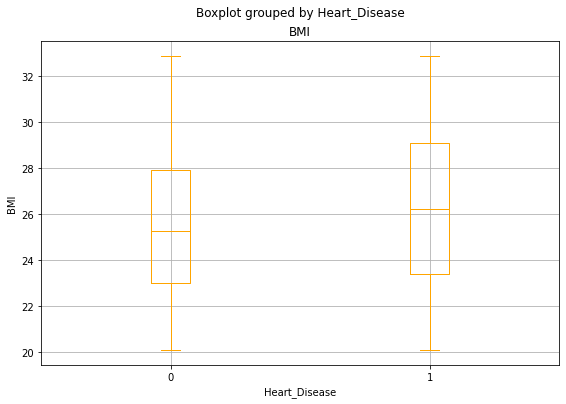

In [153]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'BMI', by = 'Heart_Disease', ax = ax, color='orange')
ax.set_ylabel("BMI")
plt.show()

###6. Cholestrol Distribution

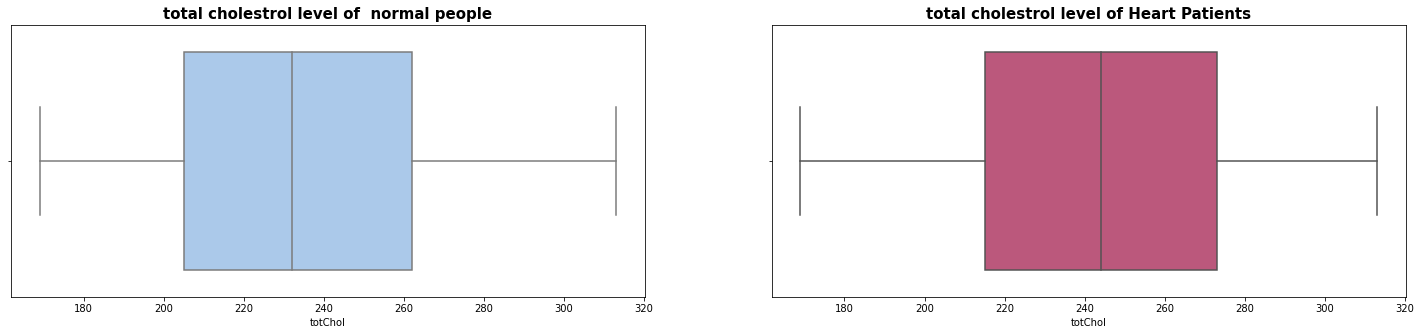

In [154]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(x='totChol',data = normal, palette='pastel')
plt.title('total cholestrol level of  normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='totChol',data = patient, palette='plasma')
plt.title('total cholestrol level of Heart Patients', fontsize=15, weight='bold' )
plt.show()

* Total Cholestrol level of heart patient seems to be slightly higher than normal patient. 
* People with similar levels of cholestrol have got heart disease as well as are free from heart disease. 
* Clearly, there is no direct correlation of heart disease with the cholestrol level.

###7. Mean Arterial Pressure (map) Distribution

Text(0.5, 1.0, 'Map of heart disease patients')

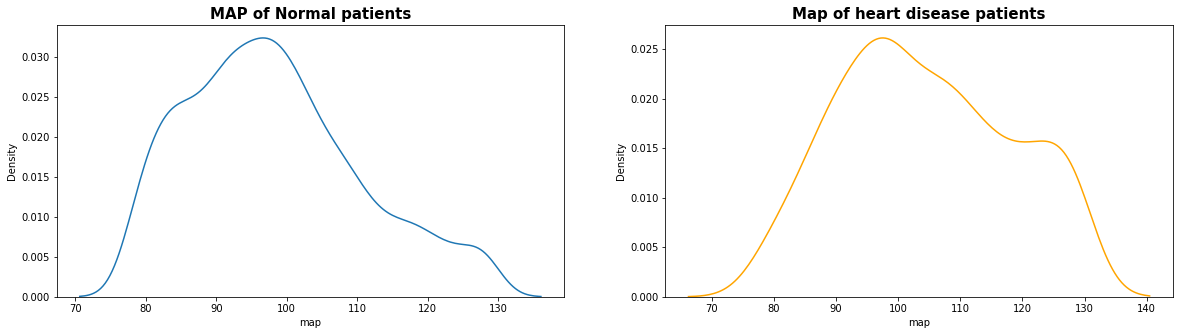

In [155]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.kdeplot(x=normal['map'], palette='')
plt.title('MAP of Normal patients', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.kdeplot(x=patient['map'], color= 'orange')
plt.title('Map of heart disease patients', fontsize=15, weight='bold' )

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 1 to 3389
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3004 non-null   int64  
 1   sex              3004 non-null   int64  
 2   cigsPerDay       3004 non-null   float64
 3   BPMeds           3004 non-null   float64
 4   prevalentStroke  3004 non-null   int64  
 5   diabetes         3004 non-null   int64  
 6   totChol          3004 non-null   float64
 7   BMI              3004 non-null   float64
 8   heartRate        3004 non-null   float64
 9   glucose          3004 non-null   float64
 10  Heart_Disease    3004 non-null   int64  
 11  map              3004 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 369.6 KB


##Bivariate Analysis

###1. BP Medication and Heart_Disease

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

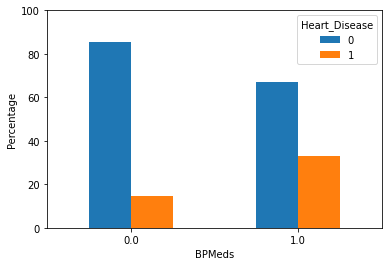

In [157]:
freq_df = df.groupby('Heart_Disease')['BPMeds'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

* People who take Blood pressure meds have a higher chance of having heart disease.

###2. Prevalent Stroke and Heart_Disease

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

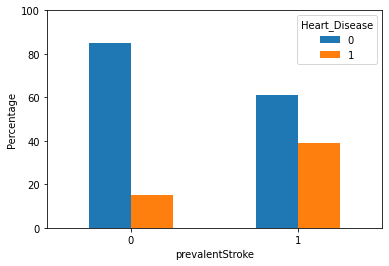

In [158]:
freq_df = df.groupby('Heart_Disease')['prevalentStroke'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

* Higher percentage of patients with prevalent stroke symptoms have a 10-year risk of Heart disease.

###3. Diabetes and Heart_Disease

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

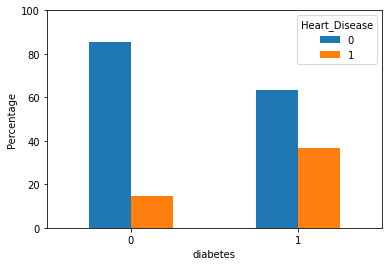

In [159]:
freq_df = df.groupby('Heart_Disease')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

###4.

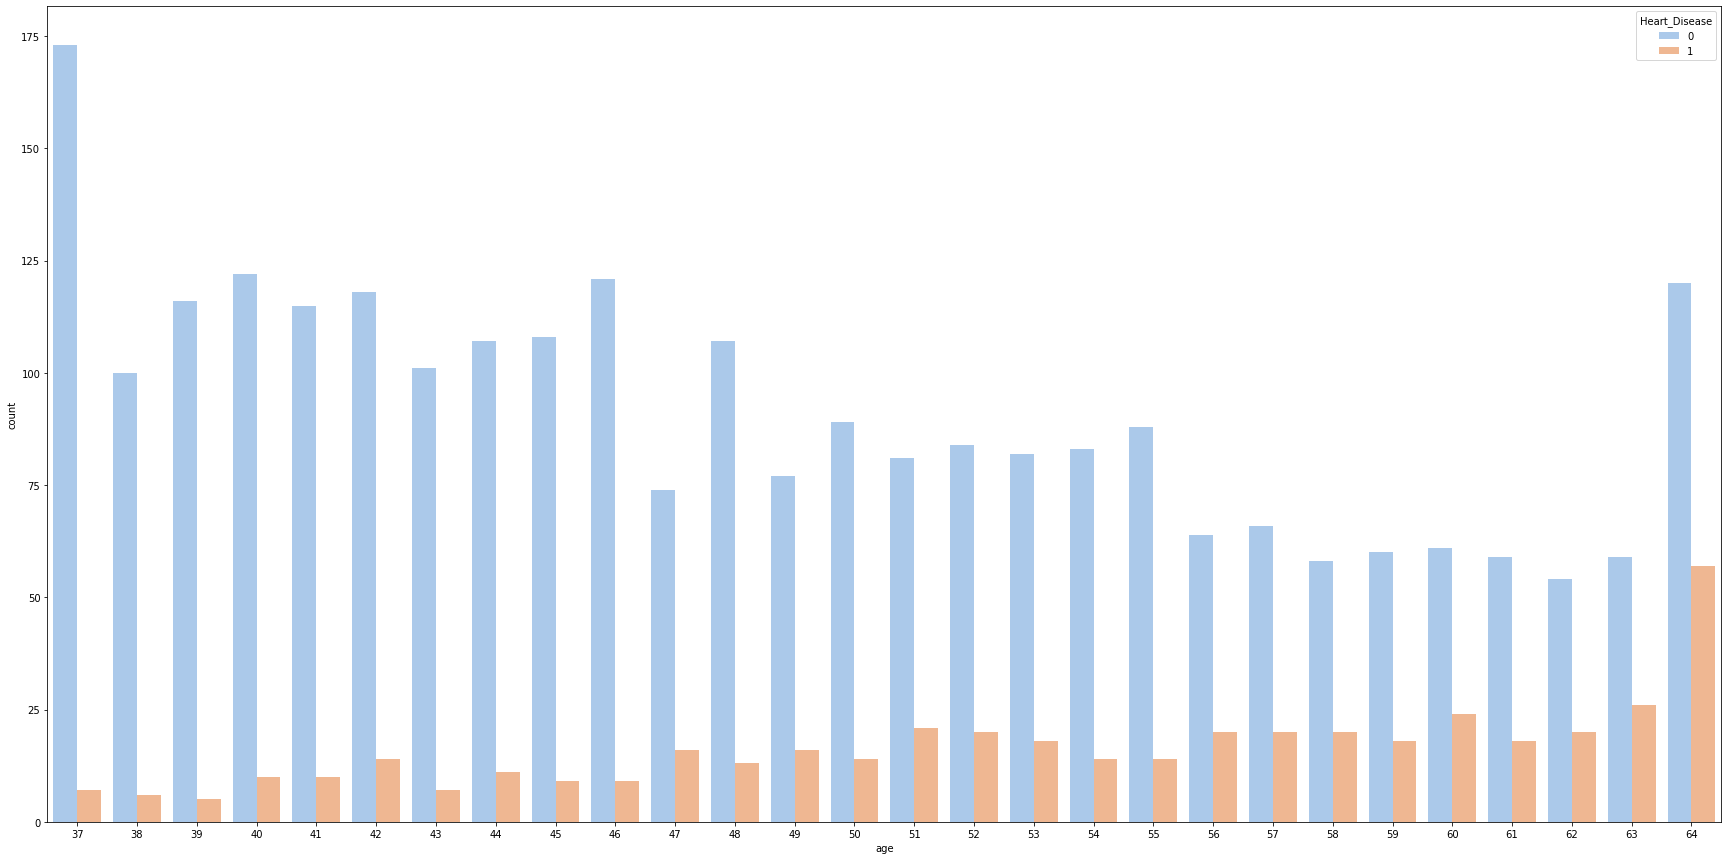

In [160]:
plt.figure(figsize=(30,15))
sns.countplot(data=df,x='age',hue='Heart_Disease',palette='pastel')
plt.show()

* Chances of getting CHD are mostly among the age group 42-63.

* While age group below 35 has lowest chances of getting CHD.

###5. sex and risk of Heart_Disease

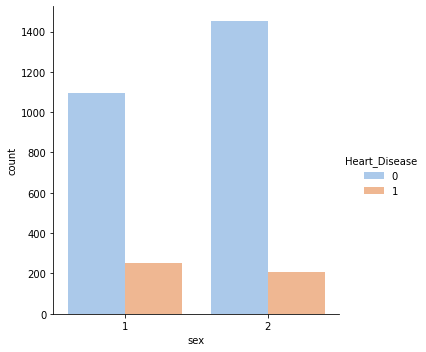

In [161]:
sns.catplot(data= df, kind='count', x='sex', hue='Heart_Disease', palette='pastel')
plt.show()

#Models

##Dependent and independent variables

In [162]:
# Splitting the data into set of independent variables and a dependent variable.
X = df.drop('Heart_Disease',axis=1).values
y = df['Heart_Disease'].values

##Train test split

In [163]:
# splitting data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

##Data Standardization

In [164]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#1. Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [166]:
# Get the model coefficients
lr_model.coef_

array([[ 0.58044896, -0.21429302,  0.28348484,  0.06196233,  0.03868728,
         0.11882944,  0.1131717 ,  0.0267905 , -0.01969659,  0.11258364,
         0.3011826 ]])

In [167]:
lr_model.intercept_

array([-1.97155659])

In [168]:
train_pred = lr_model.predict_proba(X_train)
test_pred = lr_model.predict_proba(X_test)

In [169]:
test_pred

array([[0.95964145, 0.04035855],
       [0.75507408, 0.24492592],
       [0.56687396, 0.43312604],
       ...,
       [0.85742667, 0.14257333],
       [0.94227458, 0.05772542],
       [0.96296125, 0.03703875]])

In [170]:
train_preds = lr_model.predict_proba(X_train)[:,1]
test_preds = lr_model.predict_proba(X_test)[:,1]

In [171]:
# Get the predicted classes
X_pred_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

In [172]:
from sklearn.metrics import classification_report, accuracy_score
lr_cr = classification_report(y_test,y_pred_lr,output_dict = True)
lr_cr = pd.DataFrame(lr_cr).T
print('accuracy_score =',accuracy_score(y_test,y_pred_lr))
lr_cr

accuracy_score = 0.848585690515807


,precision,recall,f1-score,support
0,0.852101,0.994118,0.917647,510.000000
1,0.500000,0.032967,0.061856,91.000000
accuracy,0.848586,0.848586,0.848586,0.848586
macro avg,0.676050,0.513542,0.489751,601.000000
weighted avg,0.798788,0.848586,0.788068,601.000000


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Logistic Regression,0.848586,0.5,0.032967,0.994118,0.061856,0.513542


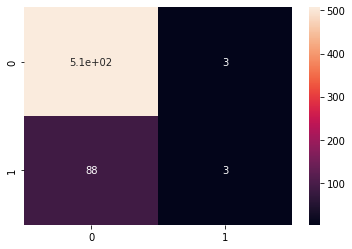

In [173]:
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score
CM=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_lr)
roc=roc_auc_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

evaluation_metrics1 =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics1

#2. KNN Model

##a.KNN model without imbalancing the Dataset

In [174]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [175]:
##KNN on balanced dataset
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)

In [176]:
print(accuracy_score(y_test,y_pred_knn))
pd.crosstab(y_test,y_pred_knn)

0.8435940099833611


col_0,0,1
row_0,,
0,499,11
1,83,8


This model showing the accuracy of 82.9% without Balancing the dataset. Let's Balanced the dataset and then check the accuracy.

###Handling Data Imbalance using SMOTE

In [177]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [179]:
from imblearn.over_sampling import SMOTE

In [180]:
# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X, y)

In [181]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [182]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [183]:
from collections import Counter

##b.KNN using Balanced dataset using SMOTE

In [184]:
##KNN on balanced dataset
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)

In [185]:
print(accuracy_score(y_test,y_pred_knn))
pd.crosstab(y_test,y_pred_knn)

0.8058887677208287


col_0,0,1
row_0,,
0,383,126
1,52,356


Model Evaluation

In [186]:
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,KNN,0.805889,0.738589,0.872549,0.752456,0.8,0.812502


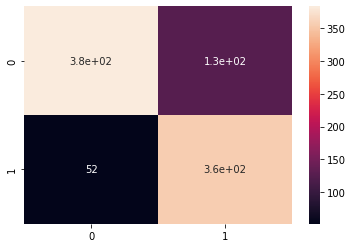

In [187]:
CM=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

evaluation_metrics2 =pd.DataFrame([['KNN',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics2

##3.Decision Tree Classifier

In [188]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,DecisionTree,0.804798,0.758465,0.823529,0.789784,0.789659,0.806657


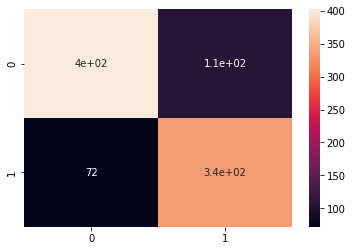

In [190]:
CM=confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_dtc)
roc=roc_auc_score(y_test, y_pred_dtc)
prec = precision_score(y_test, y_pred_dtc)
rec = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)

evaluation_metrics3 =pd.DataFrame([['DecisionTree',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics3

##4. Gradient Boost Classifier

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

In [192]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,GradientBoosting,0.806979,0.840708,0.698529,0.89391,0.763052,0.79622


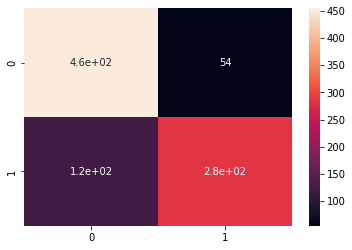

In [193]:
CM=confusion_matrix(y_test,y_pred_gbm)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gbm)
roc=roc_auc_score(y_test, y_pred_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)

evaluation_metrics4 =pd.DataFrame([['GradientBoosting',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics4

##5. XGBoost

In [194]:
import xgboost as xgb

In [195]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,XGBoost,0.865867,0.905983,0.779412,0.935167,0.837945,0.857289


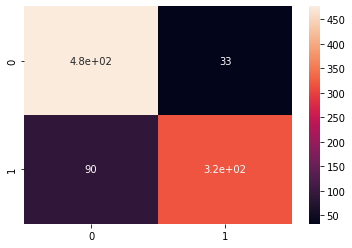

In [196]:
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

evaluation_metrics5 =pd.DataFrame([['XGBoost',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics5

##6. Naive Bayes Classifier

In [197]:
from sklearn.naive_bayes import GaussianNB

In [198]:
# Creating naive bayes model 
gnb = GaussianNB()

# Fitting the model
gnb.fit(X_smote, y_smote)
 
# Making predictions on training and testing set
y_pred_gnb = gnb.predict(X_test)
y_train_pred = gnb.predict(X_smote)

In [199]:
# Display accuracy scores for training and testing sets
print(accuracy_score(y_train_pred, y_smote))
print(accuracy_score(y_pred_gnb, y_test))

0.6288457342352171
0.5965103598691385


In [200]:
# Confusion matrix for training data in naive bayes classifier
confusion_matrix(y_smote, y_train_pred)

array([[2317,  229],
       [1472,  565]])

In [201]:
# Confusion matrix for testing data in naive bayes classifier
confusion_matrix(y_test, y_pred_gnb)

array([[488,  21],
       [349,  59]])

In [202]:
# Prediction probabilities for naive bayes classifier
y_pred_proba_gnb = gnb.predict_proba(X_test)[:,1]

In [203]:
# Getting the parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gnb)

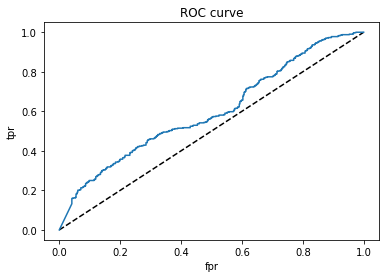

In [204]:
# Plotting the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [205]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba_gnb)

0.5988433683886127

In [206]:
# Importing Counter.
from collections import Counter

In [207]:
# Counts of test set 
Counter(y_test)

Counter({1: 408, 0: 509})

In [208]:
# counts of predicted set
Counter(y_pred_gnb)

Counter({1: 80, 0: 837})

In [209]:
# Getting Classification report for Naive bayes classifier
dict1= classification_report(y_test, y_pred_gnb, output_dict=True)

#adding results to evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf

,precision,recall,f1-score,support
0,0.583035,0.958743,0.725111,509.00000
1,0.737500,0.144608,0.241803,408.00000
accuracy,0.596510,0.596510,0.596510,0.59651
macro avg,0.660267,0.551675,0.483457,917.00000
weighted avg,0.651761,0.596510,0.510074,917.00000


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Naive Bayes,0.59651,0.7375,0.144608,0.958743,0.241803,0.551675


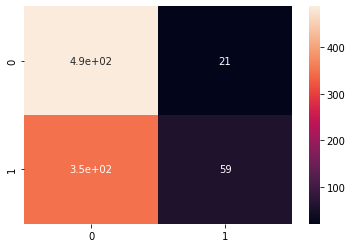

In [210]:
CM=confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gnb)
roc=roc_auc_score(y_test, y_pred_gnb)
prec = precision_score(y_test, y_pred_gnb)
rec = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

evaluation_metrics6 =pd.DataFrame([['Naive Bayes',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics6

##7.Support Vector CLassifier

In [211]:
from sklearn.svm import SVC

In [212]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,SupportVector,0.671756,0.627078,0.647059,0.691552,0.636912,0.669305


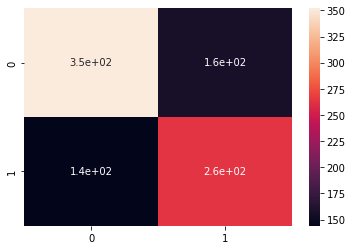

In [213]:

CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

evaluation_metrics7 =pd.DataFrame([['SupportVector',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics7

#Models' Evaluation Matrix

In [214]:
evaluation_metrics = [evaluation_metrics1,evaluation_metrics2,evaluation_metrics3,
                      evaluation_metrics4,evaluation_metrics5,evaluation_metrics6,
                      evaluation_metrics7]

In [215]:
em_list=pd.concat(evaluation_metrics).reset_index(drop=True)
em_list

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Logistic Regression,0.848586,0.500000,0.032967,0.994118,0.061856,0.513542
1,KNN,0.805889,0.738589,0.872549,0.752456,0.800000,0.812502
2,DecisionTree,0.804798,0.758465,0.823529,0.789784,0.789659,0.806657
3,GradientBoosting,0.806979,0.840708,0.698529,0.893910,0.763052,0.796220
4,XGBoost,0.865867,0.905983,0.779412,0.935167,0.837945,0.857289
5,Naive Bayes,0.596510,0.737500,0.144608,0.958743,0.241803,0.551675
6,SupportVector,0.671756,0.627078,0.647059,0.691552,0.636912,0.669305
